#### Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from pprint import pprint

#### Download data + description of data

In [2]:
df = pd.read_csv('sample_data.csv', sep=';')
df.head()

,user_id,target,retrodate,g1(l1.1),g2(l2.1),g2(l2.2),g2(l2.3),g2(l2.4),g2(l2.5),g2(l2.6),...,g14(l14.5),g14(l14.6),g14(l14.7),g15(l15.1),g15(l15.2),g15(l15.3),g15(l15.4),g15(l15.5),g15(l15.6),g15(l15.7)
0,0,0,2020/10/27,"[[2020/10/17, 1], [2020/10/18, 1], [2020/10/19...","[[2020/10/13, 1], [2020/10/15, 4], [2020/10/18...","[[2020/10/13, 4], [2020/10/16, 1], [2020/10/17...","[[2020/10/13, 4], [2020/10/15, 1], [2020/10/16...","[[2020/10/13, 4], [2020/10/14, 4], [2020/10/15...","[[2020/10/13, 2], [2020/10/16, 4], [2020/10/17...","[[2020/10/14, 1], [2020/10/17, 4], [2020/10/21...",...,"[[2020/10/13, 4], [2020/10/14, 4], [2020/10/17...","[[2020/10/13, 2], [2020/10/15, 2], [2020/10/17...","[[2020/10/13, 5], [2020/10/14, 1], [2020/10/20...","[[2020/10/17, 2], [2020/10/20, 2], [2020/10/24...","[[2020/10/15, 5], [2020/10/16, 5], [2020/10/18...","[[2020/10/13, 1], [2020/10/16, 2], [2020/10/19...","[[2020/10/14, 5], [2020/10/16, 3], [2020/10/18...","[[2020/10/16, 2], [2020/10/17, 2], [2020/10/22...","[[2020/10/15, 2], [2020/10/17, 1], [2020/10/19...","[[2020/10/13, 2], [2020/10/16, 5], [2020/10/18..."
1,1,1,2021/2/17,"[[2021/2/3, 2], [2021/2/6, 2], [2021/2/7, 5], ...","[[2021/2/3, 2], [2021/2/5, 1], [2021/2/10, 4],...","[[2021/2/4, 4], [2021/2/6, 5], [2021/2/8, 5], ...","[[2021/2/4, 3], [2021/2/5, 1], [2021/2/6, 4], ...","[[2021/2/3, 1], [2021/2/4, 1], [2021/2/6, 1], ...","[[2021/2/3, 1], [2021/2/6, 1], [2021/2/7, 5], ...","[[2021/2/3, 5], [2021/2/5, 4], [2021/2/9, 3], ...",...,"[[2021/2/4, 4], [2021/2/6, 4], [2021/2/11, 3],...","[[2021/2/4, 5], [2021/2/6, 4], [2021/2/12, 5],...","[[2021/2/5, 4], [2021/2/6, 1], [2021/2/8, 5], ...","[[2021/2/5, 2], [2021/2/6, 4], [2021/2/8, 2], ...","[[2021/2/3, 5], [2021/2/4, 3], [2021/2/10, 4],...","[[2021/2/3, 1], [2021/2/5, 2], [2021/2/6, 1], ...","[[2021/2/4, 5], [2021/2/5, 1], [2021/2/8, 1], ...","[[2021/2/3, 3], [2021/2/9, 1], [2021/2/10, 1],...","[[2021/2/3, 1], [2021/2/4, 2], [2021/2/6, 2], ...","[[2021/2/3, 3], [2021/2/4, 1], [2021/2/5, 5], ..."
2,2,0,2021/2/24,"[[2021/2/12, 5], [2021/2/17, 4]]","[[2021/2/11, 1], [2021/2/13, 2], [2021/2/16, 4...","[[2021/2/13, 5], [2021/2/15, 1], [2021/2/16, 2...","[[2021/2/11, 2], [2021/2/13, 4], [2021/2/15, 5...","[[2021/2/12, 4], [2021/2/13, 3], [2021/2/14, 1...","[[2021/2/10, 5], [2021/2/13, 4], [2021/2/14, 2...","[[2021/2/10, 5], [2021/2/14, 5], [2021/2/15, 3...",...,"[[2021/2/10, 3], [2021/2/11, 3], [2021/2/12, 3...","[[2021/2/10, 2], [2021/2/12, 5], [2021/2/14, 5...","[[2021/2/10, 1], [2021/2/11, 3], [2021/2/13, 2...","[[2021/2/11, 4], [2021/2/12, 4], [2021/2/16, 4...","[[2021/2/10, 1], [2021/2/12, 3], [2021/2/14, 1...","[[2021/2/11, 5], [2021/2/12, 1], [2021/2/13, 5...","[[2021/2/12, 5], [2021/2/16, 3]]","[[2021/2/14, 3], [2021/2/15, 5], [2021/2/17, 4...","[[2021/2/10, 5], [2021/2/11, 4], [2021/2/12, 3...","[[2021/2/10, 2], [2021/2/16, 5], [2021/2/22, 4..."
3,3,0,2020/2/21,"[[2020/2/7, 1], [2020/2/8, 5], [2020/2/12, 1],...","[[2020/2/10, 4], [2020/2/13, 3], [2020/2/14, 3...","[[2020/2/9, 1], [2020/2/10, 5], [2020/2/11, 5]...","[[2020/2/7, 1], [2020/2/8, 5], [2020/2/10, 3],...","[[2020/2/11, 1], [2020/2/12, 1], [2020/2/13, 2...","[[2020/2/7, 1], [2020/2/10, 1], [2020/2/11, 4]...","[[2020/2/11, 4], [2020/2/12, 2], [2020/2/13, 2...",...,"[[2020/2/7, 4], [2020/2/8, 2], [2020/2/9, 4], ...","[[2020/2/9, 5], [2020/2/10, 2], [2020/2/11, 2]...","[[2020/2/7, 1], [2020/2/10, 5], [2020/2/12, 1]...","[[2020/2/9, 1], [2020/2/12, 5], [2020/2/13, 3]...","[[2020/2/7, 4], [2020/2/8, 1], [2020/2/12, 1],...","[[2020/2/10, 5], [2020/2/19, 2]]","[[2020/2/7, 5], [2020/2/8, 5], [2020/2/10, 5],...","[[2020/2/9, 4], [2020/2/11, 5], [2020/2/13, 4]...","[[2020/2/10, 4], [2020/2/13, 1], [2020/2/16, 2...","[[2020/2/7, 2], [2020/2/10, 5], [2020/2/14, 5]..."
4,4,1,2021/3/24,"[[2021/3/11, 1], [2021/3/14, 3], [2021/3/15, 3...","[[2021/3/10, 2], [2021/3/11, 1], [2021/3/12, 1...","[[2021/3/10, 4], [2021/3/13, 2], [2021/3/14, 4...","[[2021/3/11, 5], [2021/3/14, 3], [2021/3/16, 5...","[[2021

Структура данных следующая:

- id пользователя
- target - является ли пользователь заинтересованным в данном товаре в конкретную дату
- ретродата - конкретная дата, в которую мы бы хотели уметь предсказывать интерес пользователя
- все следующие столбцы описывают поведение пользователя в сети в предыдущие 2 недели.
    - каждый столбец соответствует определнной ссылке
    - ссылки анонимизированы 
    - ссылки разбиты на группы, группы определяются по префиксу столбца, в группах может быть разное количество ссылок
    - история представляет собой список пар - (дата посещения, количество посещений в эту дату)

#### General description of data

In [3]:
# table size
print("df shape         :", df.shape)
# number of unique users
print("unique users     :", df.user_id.nunique())
# number of groups
groups_columns = df.columns.tolist()[3:]
groups_list = list(map(lambda col: col.split('(')[0], groups_columns))
groups_set = set(groups_list)
print("number of groups :", len(groups_set))

df shape         : (1000, 74)
unique users     : 1000
number of groups : 15


Nuber of links in groups:

In [4]:
for group, count in Counter(groups_list).most_common():
    print(group, count)

g8 9
g2 8
g7 8
g14 7
g15 7
g3 6
g4 5
g5 4
g6 4
g10 4
g9 2
g11 2
g12 2
g13 2
g1 1


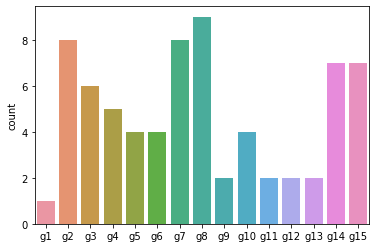

In [5]:
sns.countplot(x=groups_list)

#### Data processing

First of all lets convert lists in cells into real lists (now they are string-lists).

In [6]:
def make_normal_list(string_list):
    history = string_list.split('], [')
    
    # if there is at least one normal date with visits
    if len(history[0]) > 4:
        history[0] = history[0][2:]
        history[-1] = history[-1][:-2]
    else:
        history = []
    
    day_process = lambda x: (pd.to_datetime(x.split(',')[0], format='%Y/%m/%d').date(), 
                             int(x.split(',')[1]))
    
    history = [day_process(day) for day in history]

    return history

In [7]:
def make_normal_list_series(series):
    return series.apply(make_normal_list)

In [8]:
df.retrodate = pd.to_datetime(df.retrodate, format='%Y/%m/%d').dt.date

In [9]:
df[groups_columns] = df[groups_columns].apply(make_normal_list_series)

In [10]:
df.head()

,user_id,target,retrodate,g1(l1.1),g2(l2.1),g2(l2.2),g2(l2.3),g2(l2.4),g2(l2.5),g2(l2.6),...,g14(l14.5),g14(l14.6),g14(l14.7),g15(l15.1),g15(l15.2),g15(l15.3),g15(l15.4),g15(l15.5),g15(l15.6),g15(l15.7)
0,0,0,2020-10-27,"[(2020-10-17, 1), (2020-10-18, 1), (2020-10-19...","[(2020-10-13, 1), (2020-10-15, 4), (2020-10-18...","[(2020-10-13, 4), (2020-10-16, 1), (2020-10-17...","[(2020-10-13, 4), (2020-10-15, 1), (2020-10-16...","[(2020-10-13, 4), (2020-10-14, 4), (2020-10-15...","[(2020-10-13, 2), (2020-10-16, 4), (2020-10-17...","[(2020-10-14, 1), (2020-10-17, 4), (2020-10-21...",...,"[(2020-10-13, 4), (2020-10-14, 4), (2020-10-17...","[(2020-10-13, 2), (2020-10-15, 2), (2020-10-17...","[(2020-10-13, 5), (2020-10-14, 1), (2020-10-20...","[(2020-10-17, 2), (2020-10-20, 2), (2020-10-24...","[(2020-10-15, 5), (2020-10-16, 5), (2020-10-18...","[(2020-10-13, 1), (2020-10-16, 2), (2020-10-19...","[(2020-10-14, 5), (2020-10-16, 3), (2020-10-18...","[(2020-10-16, 2), (2020-10-17, 2), (2020-10-22...","[(2020-10-15, 2), (2020-10-17, 1), (2020-10-19...","[(2020-10-13, 2), (2020-10-16, 5), (2020-10-18..."
1,1,1,2021-02-17,"[(2021-02-03, 2), (2021-02-06, 2), (2021-02-07...","[(2021-02-03, 2), (2021-02-05, 1), (2021-02-10...","[(2021-02-04, 4), (2021-02-06, 5), (2021-02-08...","[(2021-02-04, 3), (2021-02-05, 1), (2021-02-06...","[(2021-02-03, 1), (2021-02-04, 1), (2021-02-06...","[(2021-02-03, 1), (2021-02-06, 1), (2021-02-07...","[(2021-02-03, 5), (2021-02-05, 4), (2021-02-09...",...,"[(2021-02-04, 4), (2021-02-06, 4), (2021-02-11...","[(2021-02-04, 5), (2021-02-06, 4), (2021-02-12...","[(2021-02-05, 4), (2021-02-06, 1), (2021-02-08...","[(2021-02-05, 2), (2021-02-06, 4), (2021-02-08...","[(2021-02-03, 5), (2021-02-04, 3), (2021-02-10...","[(2021-02-03, 1), (2021-02-05, 2), (2021-02-06...","[(2021-02-04, 5), (2021-02-05, 1), (2021-02-08...","[(2021-02-03, 3), (2021-02-09, 1), (2021-02-10...","[(2021-02-03, 1), (2021-02-04, 2), (2021-02-06...","[(2021-02-03, 3), (2021-02-04, 1), (2021-02-05..."
2,2,0,2021-02-24,"[(2021-02-12, 5), (2021-02-17, 4)]","[(2021-02-11, 1), (2021-02-13, 2), (2021-02-16...","[(2021-02-13, 5), (2021-02-15, 1), (2021-02-16...","[(2021-02-11, 2), (2021-02-13, 4), (2021-02-15...","[(2021-02-12, 4), (2021-02-13, 3), (2021-02-14...","[(2021-02-10, 5), (2021-02-13, 4), (2021-02-14...","[(2021-02-10, 5), (2021-02-14, 5), (2021-02-15...",...,"[(2021-02-10, 3), (2021-02-11, 3), (2021-02-12...","[(2021-02-10, 2), (2021-02-12, 5), (2021-02-14...","[(2021-02-10, 1), (2021-02-11, 3), (2021-02-13...","[(2021-02-11, 4), (2021-02-12, 4), (2021-02-16...","[(2021-02-10, 1), (2021-02-12, 3), (2021-02-14...","[(2021-02-11, 5), (2021-02-12, 1), (2021-02-13...","[(2021-02-12, 5), (2021-02-16, 3)]","[(2021-02-14, 3), (2021-02-15, 5), (2021-02-17...","[(2021-02-10, 5), (2021-02-11, 4), (2021-02-12...","[(2021-02-10, 2), (2021-02-16, 5), (2021-02-22..."
3,3,0,2020-02-21,"[(2020-02-07, 1), (2020-02-08, 5), (2020-02-12...","[(2020-02-10, 4), (2020-02-13, 3), (2020-02-14...","[(2020-02-09, 1), (2020-02-10, 5), (2020-02-11...","[(2020-02-07, 1), (2020-02-08, 5), (2020-02-10...","[(2020-02-11, 1), (2020-02-12, 1), (2020-02-13...","[(2020-02-07, 1), (2020-02-10, 1), (2020-02-11...","[(2020-02-11, 4), (2020-02-12, 2), (2020-02-13...",...,"[(2020-02-07, 4), (2020-02-08, 2), (2020-02-09...","[(2020-02-09, 5), (2020-02-10, 2), (2020-02-11...","[(2020-02-07, 1), (2020-02-10, 5), (2020-02-12...","[(2020-02-09, 1), (2020-02-12, 5), (2020-02-13...","[(2020-02-07, 4), (2020-02-08, 1), (2020-02-12...","[(2020-02-10, 5), (2020-02-19, 2)]","[(2020-02-07, 5), (2020-02-08, 5), (2020-02-10...","[(2020-02-09, 4), (2020-02-11, 5), (2020-02-13...","[(2020-02-10, 4), (2020-02-13, 1), (2020-02-16...","[(2020-02-07, 2), (2020-02-10, 5), (2020-02-14..."
4,4,1,2021-03-24,"[(2021-03-11, 1), (2021-03-14, 3), (2021-03-15...","[(2021-03-10, 2), (2021-03-11, 1), (2021-03-12...","[(2021-03-10, 4), (2021-03-13, 2), (2021-03-14...","[(2021-03-11, 5), (2021-03-14, 3), (2021-03-16..

#### Feature engineering

- User activities within two previous weeks
    - total visits of all sites (inside of domain)
    - total visits for every group
    - total visits for every link
    - number of active days within period (two weeks)
    - number of active days for every group
    - average visits per active day (for domain and groups)
    - number of visits on previous (or 2, 3) day

1. total visits of all sites (inside of domain)

In [11]:
def get_total_visits(history_list):
    return sum(visits for history in history_list for (day, visits) in history)

df['total_visits_domain'] = df.apply(lambda x: get_total_visits([x[col] for col in groups_columns]), axis=1)

2. total visits for every group

In [12]:
for group in groups_set:
    df[f'total_visits_{group}'] = df.apply(lambda x: 
                                                get_total_visits([x[col] 
                                                             for col in groups_columns 
                                                             if col.startswith(group)]), axis=1)

3. total visits for every link 

skip because of enormous number of sites(we can add it in the future if it is necessary)

In [13]:
pass

4. number of active days within period (two weeks) for domain

In [14]:
def get_active_days(history_list, activity_thr=1):
    # calculate unique days with visits during history
    # activity_thr - number of days to make day active
    return len(set(day for history in history_list for (day, visits) in history if visits > activity_thr))

df['n1_active_days_domain'] = df.apply(lambda x: get_active_days([x[col] for col in groups_columns], 1), axis=1)
df['n2_active_days_domain'] = df.apply(lambda x: get_active_days([x[col] for col in groups_columns], 2), axis=1)
df['n3_active_days_domain'] = df.apply(lambda x: get_active_days([x[col] for col in groups_columns], 3), axis=1)

5. number of active days for every group

In [15]:
for group in groups_set:
    needed_cols = [col for col in groups_columns if col.startswith(group)]
    df[f'n1_active_days_{group}'] = df.apply(lambda x: get_active_days([x[col] for col in needed_cols], 1), axis=1)
    df[f'n2_active_days_{group}'] = df.apply(lambda x: get_active_days([x[col] for col in needed_cols], 2), axis=1)
    df[f'n3_active_days_{group}'] = df.apply(lambda x: get_active_days([x[col] for col in needed_cols], 3), axis=1)

6. average visits per active day (for domain and groups)

considering days with at least one visit

In [16]:
def get_av_visits_per_active_day(history_list, activity_thr=1):
    return np.mean([visits for history in history_list for (day, visits) in history if visits > activity_thr])

df['average_visits_per_day_domain'] = df.apply(lambda x: get_av_visits_per_active_day([x[col] for col in groups_columns], 1), axis=1)

for group in groups_set:
    needed_cols = [col for col in groups_columns if col.startswith(group)]
    df[f'average_visits_per_day_{group}'] = df.apply(lambda x: get_av_visits_per_active_day([x[col] for col in needed_cols], 1), axis=1)

7. number of visits on previous (or 2, 3) day

In [17]:
def get_visits_K_days_ago(history_list, retrodate, lag=1):
    return sum(visits for history in history_list for (day, visits) in history if (retrodate - day).days == lag)

df['visits_1_day_ago_domain'] = df.apply(lambda x: get_visits_K_days_ago([x[col] for col in groups_columns], x.retrodate, 1), axis=1)
df['visits_2_day_ago_domain'] = df.apply(lambda x: get_visits_K_days_ago([x[col] for col in groups_columns], x.retrodate, 2), axis=1)
df['visits_3_day_ago_domain'] = df.apply(lambda x: get_visits_K_days_ago([x[col] for col in groups_columns], x.retrodate, 3), axis=1)

for group in groups_set:
    needed_cols = [col for col in groups_columns if col.startswith(group)]
    df[f'visits_1_day_ago_{group}'] = df.apply(lambda x: get_visits_K_days_ago([x[col] for col in needed_cols], x.retrodate, 1), axis=1)
    df[f'visits_2_day_ago_{group}'] = df.apply(lambda x: get_visits_K_days_ago([x[col] for col in needed_cols], x.retrodate, 2), axis=1)
    df[f'visits_3_day_ago_{group}'] = df.apply(lambda x: get_visits_K_days_ago([x[col] for col in needed_cols], x.retrodate, 3), axis=1)
    

#### Save data for models

In [21]:
ignore_columns = groups_columns + ['retrodate']
important_columns = [c for c in df.columns if c not in ignore_columns]
len(important_columns)

130

In [22]:
df[important_columns].to_csv('sample_processed.scv', index=False)

#### Future work

Можно визуализировать посчитанные статистики, должны получаться понятные гистограммы + возможно будут видны отличия по таргету.

-----

что еще можно попробовать

Ideas and brainstorming:

Нужно придумывать признаки, которые бы коррелировали с типичным поведением пользователя и его мотивами, настроением. Возможно следует посмотреть в сторону поведения пользователя не внутри одного домена, а кросс-доменное поведение. Например, кто-то смотрит объявления про машины, хочет купить авто, значит скоро возьмет кредит. Подсовываем ему кредитную рекламу. 

Нужно найти такие близкие домены. Возможно опять же нужно кластеризовать домены по поведениям пользователей. Необходимы данные по одним и тем же пользователям в разных доменах в течение +- одного времени. 

- кластеризация пользователей на группы (возможно есть активные, средние, пассивные, для каждой группы свои модели)
- добавить к датам еще время посещения, чтобы можно было учитывать время суток
- отсутствие интереса в начале двух недель, появление интереса к концу недель к ретродате
- среднее время между соседними посещениями (также для всех сайтов, групп и всего домена)
- количество дней между первым и последним заходом
- is retrodate the same weekday as one of active days
- is retrodate the next (1, 2, 3 days) after active day
- increasing of interest within two weeks (number of visits goes up)- 